# 🧩 Dataset: Credit Card Customers

This is a classic dataset for customer segmentation, used for unsupervised learning.

PURPOSE:

Group customers based on their spending behavior.

DATASET:

You can download it from Kaggle:

👉 [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)




---



---



---

| Feature                              | Meaning                                                   |
| ------------------------------------ | --------------------------------------------------------- |
| **BALANCE**                          | credit card balance.                              |
| **BALANCE_FREQUENCY**                | How often the balance changes
| **PURCHASES**                        | Total purchase amount.                                    |
| **ONEOFF_PURCHASES**                 | Amount spent on one-off (large) purchases.                |
| **INSTALLMENTS_PURCHASES**           | Amount spent on installment (monthly) purchases.          |
| **CASH_ADVANCE**                     | Amount of cash borrowed using credit card.                |
| **PURCHASES_FREQUENCY**              | How often purchases are made.                             |
| **ONEOFF_PURCHASES_FREQUENCY**       | Frequency of one-off purchases.                           |
| **PURCHASES_INSTALLMENTS_FREQUENCY** | Frequency of installment purchases.                       |
| **CASH_ADVANCE_FREQUENCY**           | Frequency of cash advances.                               |
| **CASH_ADVANCE_TRX**                 | Number of cash advance transactions.                      |
| **PURCHASES_TRX**                    | Number of purchase transactions.                          |
| **CREDIT_LIMIT**                     | Credit limit on the card.                                 |
| **PAYMENTS**                         | Total amount paid.                                        |
| **MINIMUM_PAYMENTS**                 | Minimum amount the customer pays.                         |
| **PRC_FULL_PAYMENT**                 | % of times the customer pays the full balance.            |
| **TENURE**                           | Duration (months) the account has been open.              |





---


---



---



# 🚀 Example End-to-End Flow Summary

1️⃣ Import Data  
2️⃣ Clean & Scale Data  
3️⃣ Perform EDA  
4️⃣ Use PCA for reduction  
5️⃣ Apply KMeans/Agglomerative  
6️⃣ Find best k (Elbow/Silhouette)  
7️⃣ Evaluate clusters  
8️⃣ Visualize & interpret results  
9️⃣ Deploy or report findings


# 1️⃣ Problem Definition

We want to segment customers based on their financial behavior:

Spending habits

Cash advances

Balance frequency

Purchase frequency

 🎯 Goal: Identify customer groups (e.g., “high spenders”, “low balance frequent buyers”, etc.)

# 2️⃣ Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


# 3️⃣ Load and Inspect Data

In [ ]:
df = pd.read_csv("/content/CC GENERAL.csv")
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# 4️⃣ Data Cleaning

###**MISSING VALUES**

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


per missing value greater than 20

In [ ]:
per_missing=df.isnull().mean()*100
per_missing

,0
CUST_ID,0.000000
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [ ]:
# Drop 'CUST_ID' before filling missing values
df.drop("CUST_ID", axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)

# 5️⃣ Exploratory Data Analysis (EDA)

###**Basic stats**

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


###**PAIRWISE RELATIONSHIP**

### Focus on Key Behavioral Dimensions

For the credit card dataset, these 4 columns were chosen intentionally:

In [ ]:
df["TENURE"].value_counts()

,count
TENURE,
12,7584
11,365
10,236
6,204
8,196
7,190
9,175


| Feature        | Meaning                    | Why It’s Useful                  |
| -------------- | -------------------------- | -------------------------------- |
| `BALANCE`      | Current account balance    | Shows spending capacity          |
| `PURCHASES`    | Total purchases made       | Indicates activity level         |
| `CASH_ADVANCE` | Amount of cash withdrawals | Distinguishes cash vs card users |
| `TENURE`       | Relationship duration      | Helps identify loyal customers   |


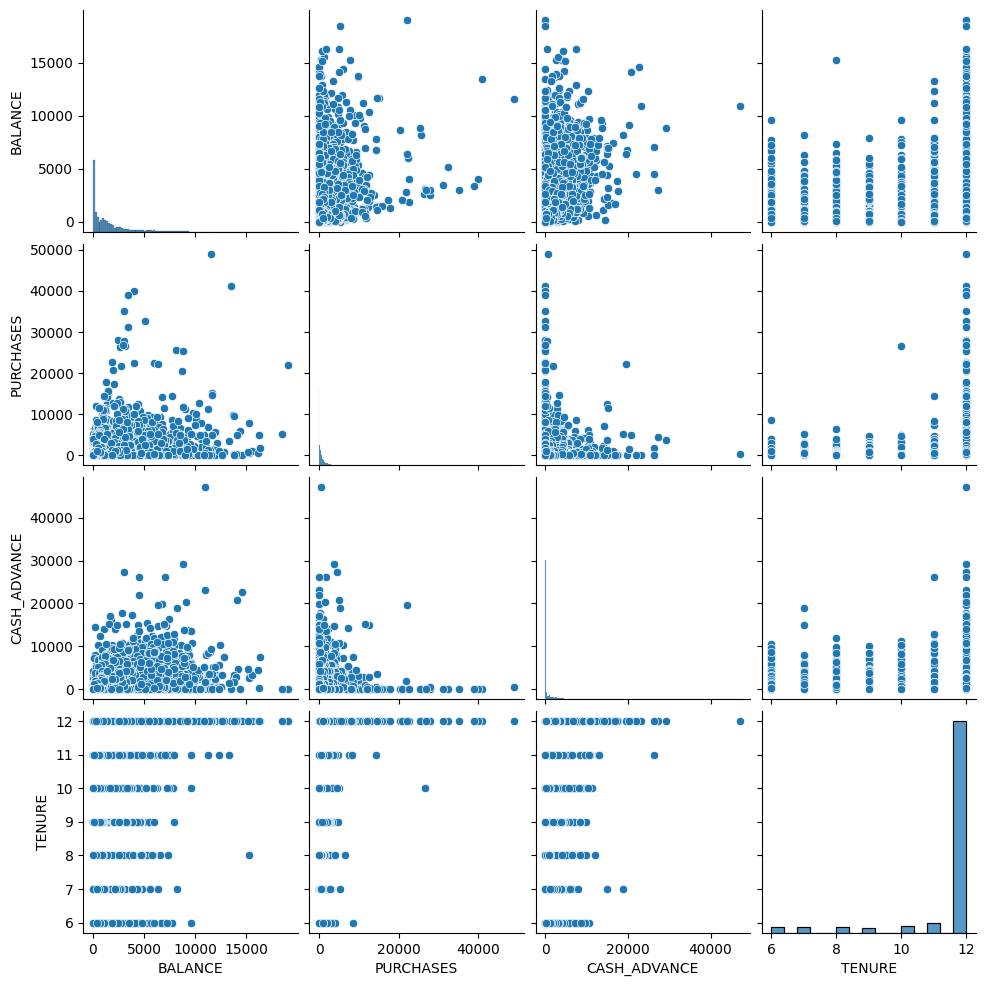

In [ ]:
sns.pairplot(df[['BALANCE','PURCHASES','CASH_ADVANCE','TENURE']])
plt.show()


#6️⃣ Feature Scaling

Clustering depends on distance, so all features must be on the same scale.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


now x_scaled is the normalize version of your data

#7️⃣ Dimensionality Reduction

Use PCA to visualize in 2D and speed up computation

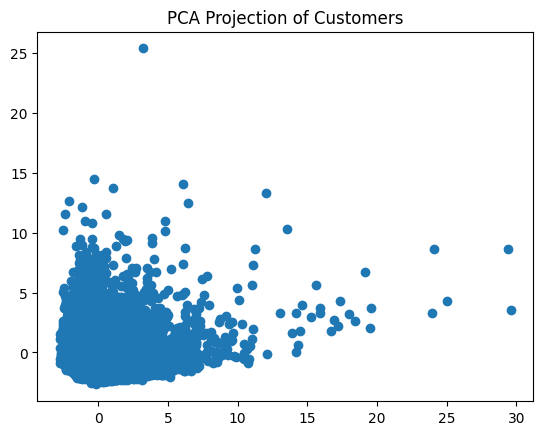

In [ ]:
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA Projection of Customers")
plt.show()


# 8️⃣ Finding Optimal Number of Clusters (K-Means)

##(a) Elbow Method:

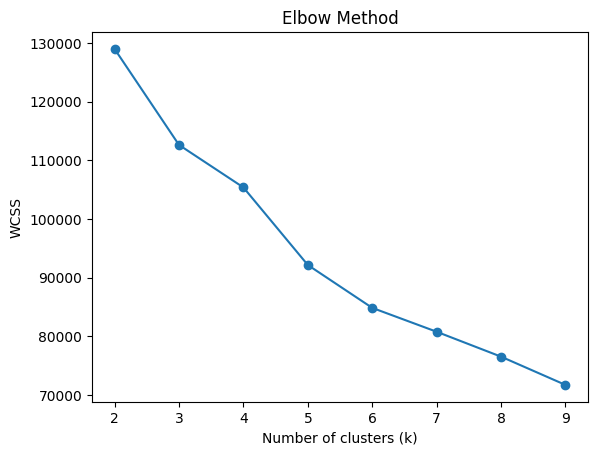

In [ ]:
WCSS = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    WCSS.append(km.inertia_)

plt.plot(range(2,10), WCSS, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


👉 Look for the “elbow point” — where inertia stops dropping sharply.
Suppose the elbow is at k = 4.

##(b) Silhouette Score:

In [ ]:
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.280
k=3, silhouette=0.207
k=4, silhouette=0.166
k=5, silhouette=0.192
k=6, silhouette=0.203
k=7, silhouette=0.195
k=8, silhouette=0.190
k=9, silhouette=0.202


k = 2, the silhouette score =0.27991297227096823
k = 3, the silhouette score =0.20676101192444302
k = 4, the silhouette score =0.16639208656701637
k = 5, the silhouette score =0.19234566924305485
k = 6, the silhouette score =0.202755081788085
k = 7, the silhouette score =0.19486979124151635
k = 8, the silhouette score =0.1899728747613868
k = 9, the silhouette score =0.2016552706516606



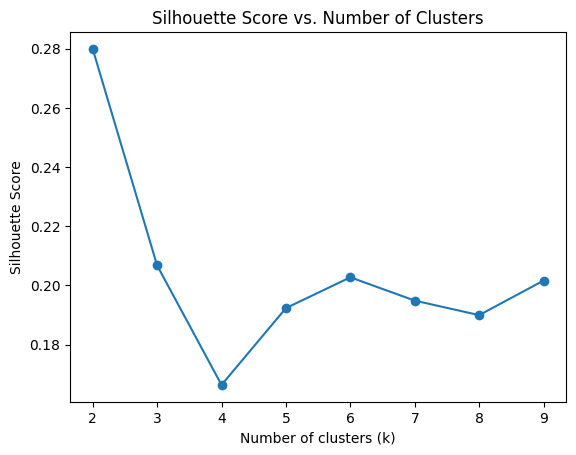

In [ ]:
silhouette_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    print(f"k = {k}, the silhouette score ={silhouette_scores[-1]}")
print()

plt.plot(range(2,10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# 9️⃣ Apply K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


Now your dataframe has an extra column — Cluster.

In [ ]:
df["Cluster"].value_counts()

,count
Cluster,
3,3370
2,3119
1,1491
0,970


# 🔟 Visualize Clusters (in PCA space)

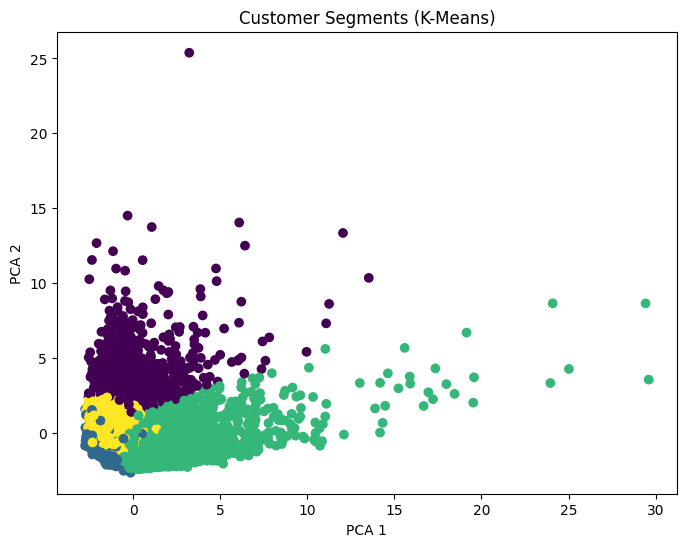

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis')
plt.title("Customer Segments (K-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


#Try Agglomerative Clustering (Comparison)

✅ Purpose:

Compare K-Means (centroid-based) with Agglomerative (hierarchical, distance-based).

Check if the clusters are consistent across algorithms.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['AggCluster'] = agg.fit_predict(X_scaled)


In [ ]:
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,AggCluster
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,3,1
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2


# visualization DBScan (agglomerative clustering)

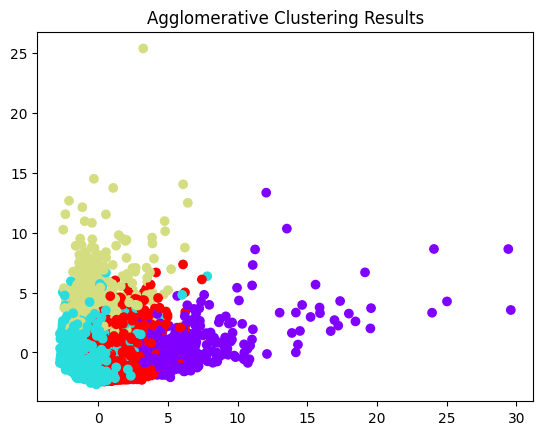

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['AggCluster'], cmap='rainbow')
plt.title("Agglomerative Clustering Results")
plt.show()


#🧩 Evaluation (Internal Metrics)

Evaluate both models using the Silhouette Score:

In [ ]:
print("K-Means Silhouette:", silhouette_score(X_scaled, df['Cluster']))
print("Agglomerative Silhouette:", silhouette_score(X_scaled, df['AggCluster']))

K-Means Silhouette: 0.16639208656701637
Agglomerative Silhouette: 0.1547093352037027


# → K-Means performs slightly better.

# **INTERPRET CLUSTERS**

In [ ]:
df['Cluster'].unique()

array([3, 0, 2, 1], dtype=int32)

✅ What cluster summary does:
Groups all customers (rows) by their cluster number and calculates the average value of each feature within that cluster.

✅ Why:

Helps understand what makes each cluster unique.

Lets you profile or label each cluster meaningfully.

In [ ]:
cluster_summmary=df.groupby("Cluster").mean()
cluster_summmary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AggCluster
Cluster,,,,,,,,,,,,,,,,,,
0,5023.958508,0.967107,721.184928,453.485000,267.804742,5075.737329,0.329511,0.161791,0.220253,0.510058,15.831959,10.420619,8215.313964,4176.805950,2227.858327,0.040022,11.414433,1.924742
1,109.464707,0.412883,351.589913,191.487250,160.571811,299.684391,0.320703,0.072810,0.235009,0.035164,0.732394,4.812877,3628.936958,1036.107793,252.929103,0.253098,11.216633,1.050973
2,1253.422099,0.974766,2181.418772,1241.370362,940.311888,234.489319,0.928436,0.390092,0.748134,0.041704,0.807310,32.718820,5120.665715,2147.982881,784.272825,0.282880,11.727477,2.346265
3,1500.348531,0.966640,282.216074,209.226223,73.305481,789.088912,0.206247,0.097865,0.108084,0.157946,3.000000,3.655490,3226.815035,954.225631,816.131081,0.022924,11.485460,1.316617


# Add Labels to Your DataFrame

cluster summary helped to label the customers

In [ ]:
cluster_labels=cluster_labels = {
    0: 'Revolver Customers',
    1: 'Occasional Customers',
    2: 'Premium Customers',
    3: 'Moderate Customers'
}

df["Customer_Type"] = df["Cluster"].map(cluster_labels)

df[["Cluster","Customer_Type"]]

,Cluster,Customer_Type
0,3,Moderate Customers
1,0,Revolver Customers
2,2,Premium Customers
3,3,Moderate Customers
4,3,Moderate Customers
...,...,...
8945,2,Premium Customers
8946,2,Premium Customers
8947,1,Occasional Customers
8948,3,Moderate Customers


#CUSTOMER TYPE VISUALIZATION

/tmp/ipython-input-1262723248.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Customer_Type",palette="viridis")


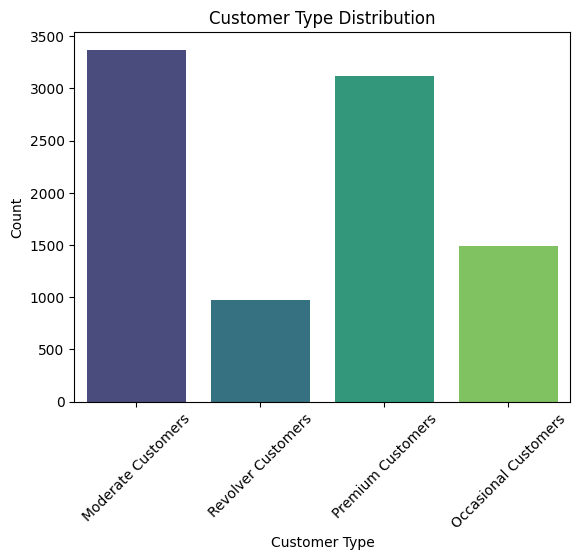

In [ ]:
sns.countplot(data=df, x="Customer_Type",palette="viridis")
plt.title("Customer Type Distribution")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 🧠 Cluster-by-Cluster Interpretation

###🟣 Cluster 0 — “Cash Advance–Heavy Customers”

High balance (₹5024)

Very high cash advances (₹5076)

Low purchase frequency (0.33)

Very few full payments (0.04)

🔹 These are customers who rely on cash advances (borrowing cash via credit card).

🔹 They likely carry high debt, pay minimum amounts, and make few purchases.

💡 Label: “Credit-Dependent / Revolver Customers”

###🔵 Cluster 1 — “Low-Balance, Light Users”

Very low balance (₹109)

Small, irregular purchases (~₹352)

Low cash advance (₹299)

Moderate full payments (0.25)

🔹 These customers rarely use their cards and maintain low balances.

🔹 They likely clear dues quickly and have low engagement.

💡 Label: “Inactive or Occasional Users”

###🟢 Cluster 2 — “High-Spending, Active Shoppers”

Very high purchases (~₹2181)

Mostly one-off and installment-based spending

High purchase frequency (0.93)

Good repayment ratio (PRC_FULL_PAYMENT = 0.28)

Low cash advances (₹234)

🔹 These are premium customers who spend a lot and pay fairly regularly.

🔹 High purchase frequency shows strong card engagement.

💡 Label: “High-Value / Premium Customers”

🟠 Cluster 3 — “Moderate Spenders with Some Cash Use”

Moderate balance (₹1500)

Low purchases (~₹282)

Medium cash advances (₹789)

Low payment ratio (0.02)

🔹 These customers use the card occasionally but also rely on cash withdrawals.

🔹 Payment ratio is low — possible credit risk or low repayment discipline.

💡 Label: “Medium-Risk Moderate Users”

# SAVE MODEL


In [ ]:
import joblib
joblib.dump(kmeans,"customer_segmentation_model.pkl")


['customer_segmentation_model.pkl']